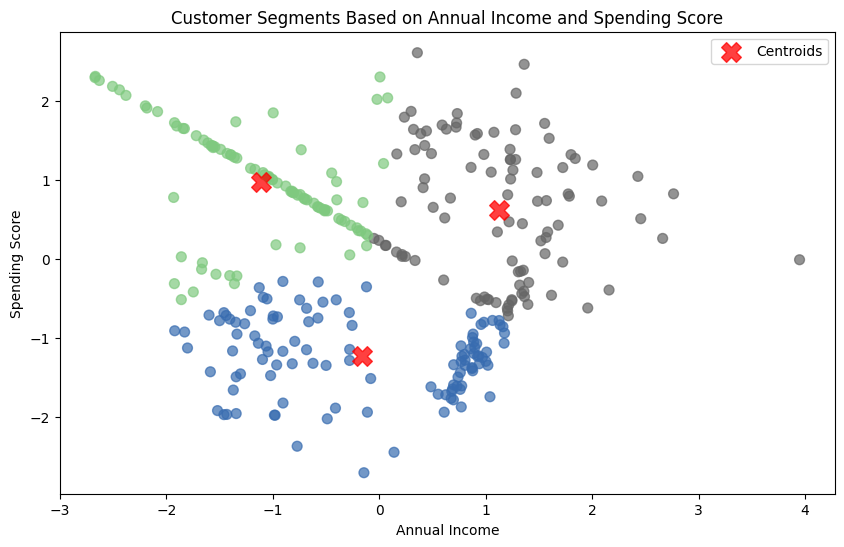

,Annual Income,Spending Score,Number of Customers
Cluster,,,
0,-1.112798,0.977999,90
1,-0.161130,-1.228925,112
2,1.128529,0.616103,98


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Step 2: Generate a synthetic customer dataset
# Simulating a dataset with 300 samples, 2 features (e.g., Annual Income and Spending Score)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)
df = pd.DataFrame(X, columns=['Annual Income', 'Spending Score'])

# Step 3: Standardize the data (optional but recommended for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 4: Apply K-means Clustering
# Set the number of clusters to 3 for this example
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Plot the clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='Accent', s=50, alpha=0.7)
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Convert centers back to original scale
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Step 6: Display a summary table showing each cluster's average spending score
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income': 'mean',
    'Spending Score': 'mean',
    'Cluster': 'size'
}).rename(columns={'Cluster': 'Number of Customers'})
cluster_summary
